In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

file = "../data/R1B9_RvsT_5mV_New.xlsx"
sheet_name = "Ithaca_all"
df = pd.read_excel(file, sheet_name=sheet_name)

In [2]:
# filter out negative current samples for regression to work
df = df.query("Current > 0")
temps = df["Temp"]
currents = df["Current"]
k_b = 1.3807e-23

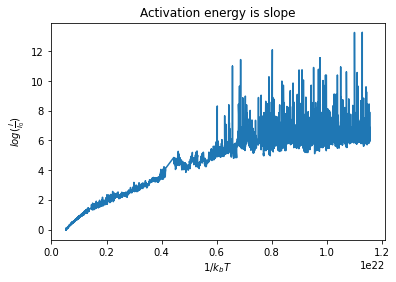

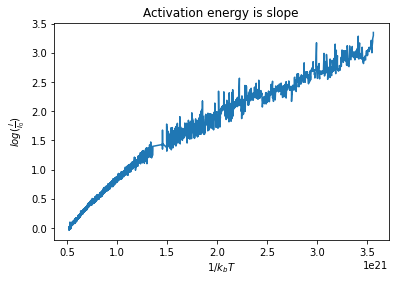

In [3]:
from math import log
%matplotlib inline
log_normed_current = [log(currents[0]/i) for i in currents]
inv_temp = [1/(k_b*t) for t in temps]
plt.plot(inv_temp, log_normed_current)
plt.title("Activation energy is slope")
plt.xlabel("$1/k_bT$")
plt.ylabel("$log(\\frac{I}{I_0})$")
plt.show()

slope_df = pd.DataFrame({"Reciptemp":inv_temp, "Log normed": log_normed_current})
filtered = slope_df.query("Reciptemp < 3.57e21")
log_normed_current = filtered['Log normed']
inv_temp = filtered['Reciptemp']

plt.plot(inv_temp, log_normed_current)
plt.title("Activation energy is slope")
plt.xlabel("$1/k_bT$")
plt.ylabel("$log(\\frac{I}{I_0})$")
plt.show()

In [6]:
1/6e21/k_b # temperature range is 12K to 48K


12.071171627918206

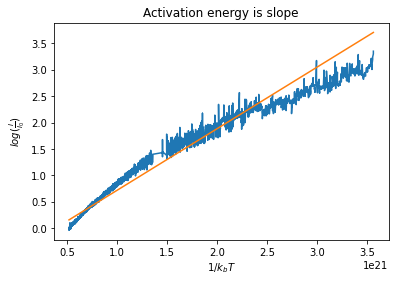

7.276439915448946


In [4]:
E_a, b = np.polyfit(inv_temp, log_normed_current,1)
plt.plot(inv_temp, log_normed_current)
plt.title("Activation energy is slope")
plt.xlabel("$1/k_bT$")
plt.ylabel("$log(\\frac{I}{I_0})$")

plt.plot(inv_temp, [i * E_a + b for i in inv_temp])
plt.show()
print(E_a/1.6e-19*1000)

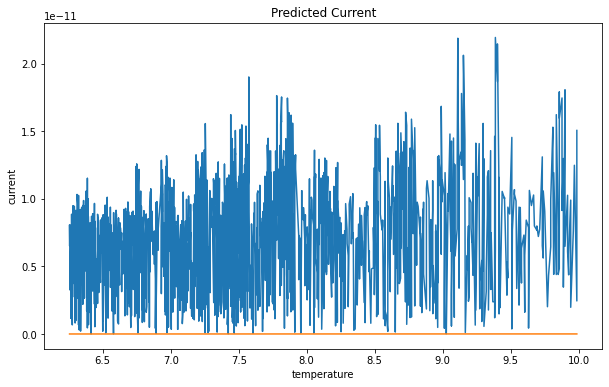

In [5]:
from math import exp

filtered = df.query("Temp < 10")
temps = list(filtered['Temp'])
currents = list(filtered['Current'])

plt.figure(figsize=(10,6))
plt.title("Predicted Current")
plt.plot(temps,currents, label="Observed")
plt.xlabel("temperature")
plt.ylabel("current")



predicted_currs = [currents[0] * exp(-E_a/(k_b*t)) for t in temps]
plt.plot(temps,predicted_currs, label="Observed")
plt.show()

In [ ]:
file = "R1B9_R-vs-T.xlsx"
sheet_name="R_vs_T_R1B92_0T_5mV"
df = pd.read_excel(file, sheet_name=sheet_name)
temp, current, voltage = df["Temp"], df["Current"], df["Voltage"]

In [ ]:
conductance = current/voltage
plt.plot(conductance,temp)
plt.xlabel("Conductance")
plt.ylabel("Temp")
plt.show()

In [ ]:
from scipy.optimize import curve_fit
def plot_IV_curve_simple(file, sheet_name, axs=None, silent=False):
    """
    :param file: Name of the file to read from
    :param sheet_name: Name of the sheet in the file
    :param axs: Optional argument with axs to plot on
    """
    df = pd.read_excel(file, sheet_name=sheet_name)
    df = df.query("Vsd > 0")
    if silent:
        return df['Vsd'], df['Current']

    if axs == None:
        axs = plt.axes()

    axs.plot(df['Vsd'], df['Current'])
    axs.set_xlabel("Voltage")
    axs.set_ylabel("Current")
    axs.set_title("Voltage-Current curve for {}".format(sheet_name))
    return df['Vsd'], df['Current']

voltages, currents = plot_IV_curve_simple("KR2B9IVcurv1.xlsx", sheet_name="H_R1B9_IVcurve_4", silent = True)

def fit_fun(x, a, b, c, d):
    return a*x**4 + b*x**3 + c*x**2 + d*x

### Poly interp to get conductance as func of voltage
p, _ = curve_fit(fit_fun, voltages, currents)
p = list(p) + [0]
outputs = np.polyval(p,voltages)

derivs = np.polyder(p)
deriv_outputs = np.polyval(derivs, voltages)

fig, axs = plt.subplots(2, figsize=(10,6))
axs[0].set_title("R1B9 IV Curves")
axs[1].set_xlabel("Voltage")
axs[0].plot(voltages,currents,label="Observed")
axs[0].plot(voltages,outputs,label="Fitted")
axs[0].legend()
axs[0].set_ylabel("Current")

axs[1].plot(voltages, deriv_outputs)
axs[1].set_ylabel("Conductance")